In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

In [18]:
# 读入文件 使用方法 eg: open_txt('butterfly.txt') 输入参数为文件的相对路径
def open_txt(image_path):
    with open(image_path, 'r') as file:
        lines = file.readlines()
    num_rows = len(lines)
    num_cols = len(lines[0].strip().split(','))
    matrix = np.zeros((num_rows, num_cols))
    for i, line in enumerate(lines):
        elements = line.strip().split(',')
        matrix[i] = [float(x) for x in elements]
    return matrix.astype(np.uint8)

In [19]:
def plot_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

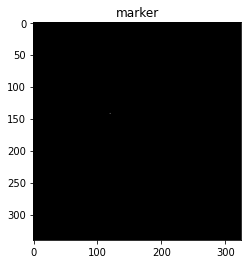

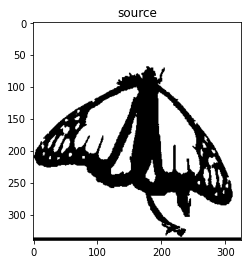

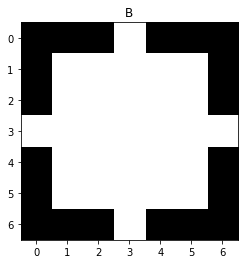

In [32]:
# 3. 形态学重建
# a) 读取marker.txt图像
marker = open_txt('marker.txt')
source = cv2.bitwise_not(open_txt('butterfly.txt'))
B=open_txt('se_1.txt')
plot_image(marker, 'marker')
plot_image(source, 'source')
plot_image(B, 'B')

$$I_{r,0}=I_m, B=se\_1$$
$$
I_{r, k}=\left(I_{r, k-1} \oplus B\right) \cap I_0^c
$$

- $\oplus$: Dilation Operator
- $\ominus$: Erosion Operator
- $\otimes$: Convolution Operator
- $\cap$: and
- $\cup$: or

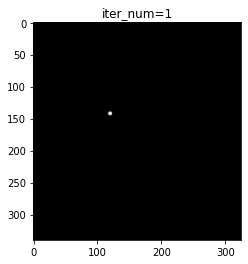

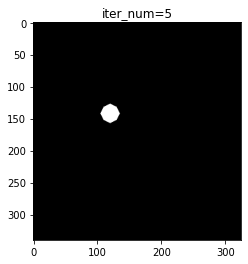

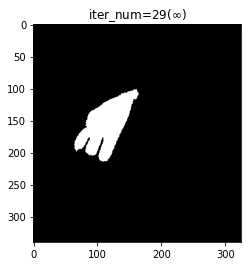

In [33]:
# 重建
iter_num = 0
while True:
    old_marker = marker
    marker = cv2.bitwise_and(source, cv2.dilate(marker, B))
    iter_num += 1
    if(iter_num==1):
        plot_image(marker, 'iter_num=1')
    if(iter_num==5):
        plot_image(marker, 'iter_num=5')
    if (marker == old_marker).all():
        break
plot_image(marker, 'iter_num='+str(iter_num)+'($\infty$)')

$$
I_{c h, 1, k}=\left[\left(I_{c h, 1, k-1} \ominus B_{11}\right) \cap\left(I_{c h, 1, k-1}^c \ominus B_{12}\right)\right] \cup I_{c h, 1, k-1}
$$

In [ ]:
def convex_hull(i_ch,B1,B2):
    while True:
        old_i_ch = i_ch
        i_ch=cv2.bitwise_or(cv2.bitwise_and(cv2.erode(old_i_ch,B1),cv2.erode(cv2.bitwise_not(old_i_ch),B2)),old_i_ch)
        if (old_i_ch==i_ch).all():
            break
    return i_ch

In [ ]:
i1=marker
B11=open_txt('./convex_hull_se/B11.txt')
B12=open_txt('./convex_hull_se/B12.txt')
B21=open_txt('./convex_hull_se/B21.txt')
B22=open_txt('./convex_hull_se/B22.txt')
B31=open_txt('./convex_hull_se/B31.txt')
B32=open_txt('./convex_hull_se/B32.txt')
B41=open_txt('./convex_hull_se/B41.txt')
B42=open_txt('./convex_hull_se/B42.txt')
print(B11)
print(B12)

In [ ]:
i_ch_1=convex_hull(i1,B11,B12)
plot_image(i_ch_1, '1')

i_ch_2=convex_hull(i1,B21,B22)
plot_image(i_ch_1, '2')

i_ch_3=convex_hull(i1,B31,B32)
plot_image(i_ch_1, '3')

i_ch_4=convex_hull(i1,B41,B42)
plot_image(i_ch_1, '4')

i_ch=cv2.bitwise_or(i_ch_1,i_ch_2,i_ch_3,i_ch_4)
plot_image(i_ch_1, 'or')